# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


1    500
0    500
Name: Liked, dtype: int64

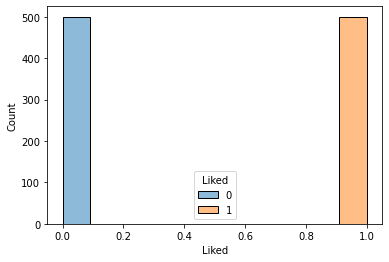

In [4]:
# Distribution des likes
sns.histplot(data=dataset, x= 'Liked', hue='Liked')
dataset['Liked'].value_counts()

In [5]:
!pip install wordcloud

## Word Cloud before preprocessing

In [6]:
# import the wordcloud library
from wordcloud import WordCloud

#Creating the text variable
text = " ".join(cat for cat in dataset.Review)

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 500,
        stopwords = [])

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

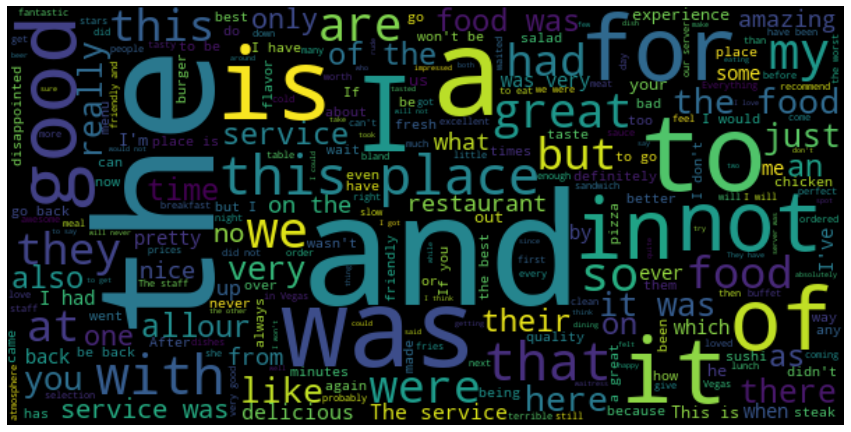

In [7]:
# create a figure
fig, ax = plt.subplots(1,1, figsize = (15,10))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

**Observation:**
There's a lot of common words that are not very meaningful. Words such as the, of, is, are, and, that, from, etc.

## Cleaning the texts

In [8]:
# import librairies
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to C:\Users\DELL LATITUDE
[nltk_data]     7470\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

## Word Cloud after cleaning the texts

In [10]:
#Creating the text variable
text1 = " ".join(cat for cat in corpus)

# Apply the wordcloud to the text.
wordcloud.generate(text1)

(-0.5, 599.5, 299.5, -0.5)

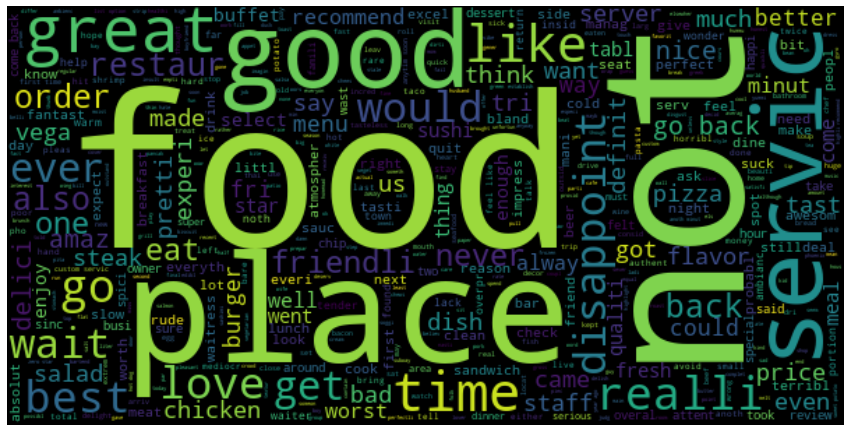

In [11]:
# create a figure
fig, ax = plt.subplots(1,1, figsize = (15,10))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

##### The word cloud shows now the most significant word.

## Creating the Bag of Words model

### 1. Count vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

<AxesSubplot:>

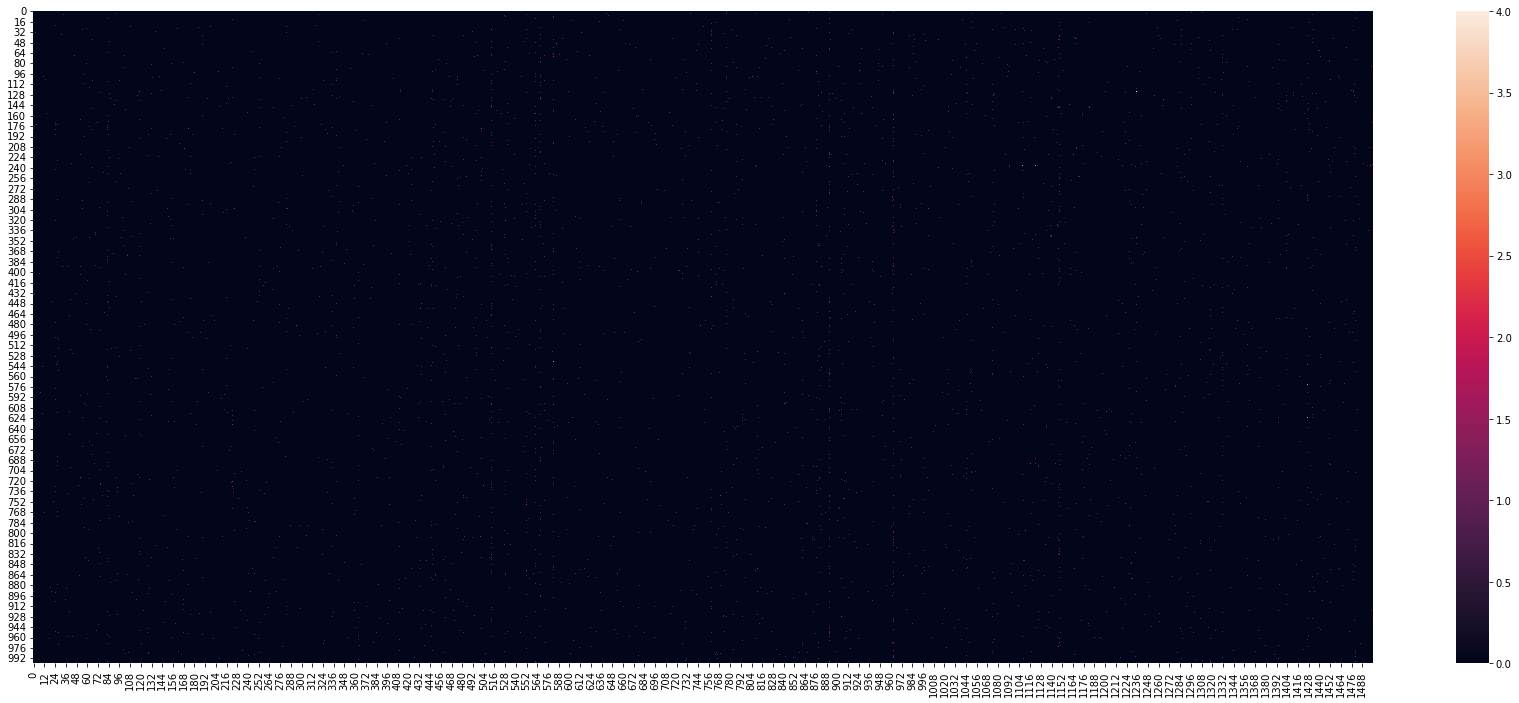

In [13]:
X1= pd.DataFrame(X)
plt.figure(figsize=(30, 12))
sns.heatmap(X1)

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Baseline: Training the Naive Bayes model on the Training set

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [16]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

[[55 42]
 [12 91]]
              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



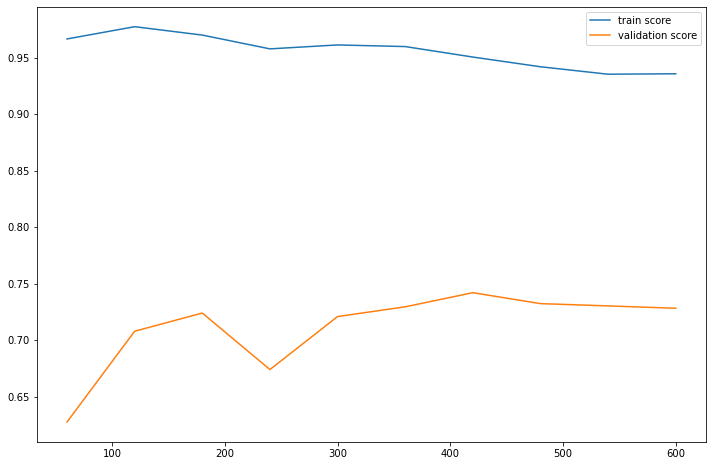

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
evaluation(classifier)

### Training the other models on the Training set

In [18]:
# Modeles to train
RandomForest = RandomForestClassifier(random_state=0)
AdaBoost = AdaBoostClassifier(random_state=0)
SVM = SVC(random_state=0)
KNN = KNeighborsClassifier()

dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }


RandomForest
[[91  6]
 [39 64]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        97
           1       0.91      0.62      0.74       103

    accuracy                           0.78       200
   macro avg       0.81      0.78      0.77       200
weighted avg       0.81      0.78      0.77       200

AdaBoost
[[90  7]
 [45 58]]
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        97
           1       0.89      0.56      0.69       103

    accuracy                           0.74       200
   macro avg       0.78      0.75      0.73       200
weighted avg       0.78      0.74      0.73       200

SVM
[[89  8]
 [36 67]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        97
           1       0.89      0.65      0.75       103

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.78  

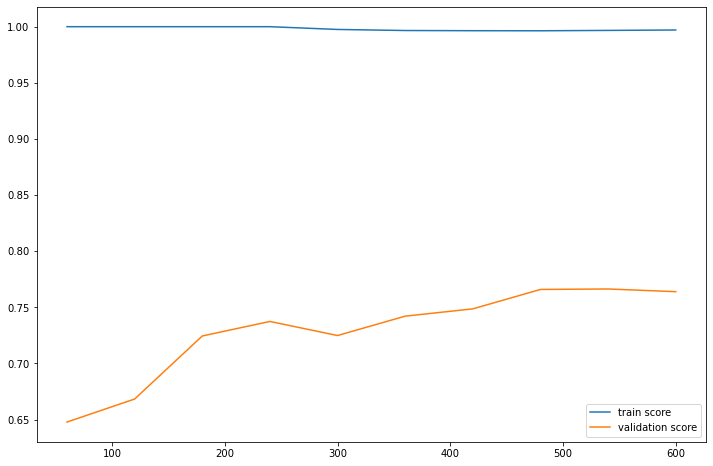

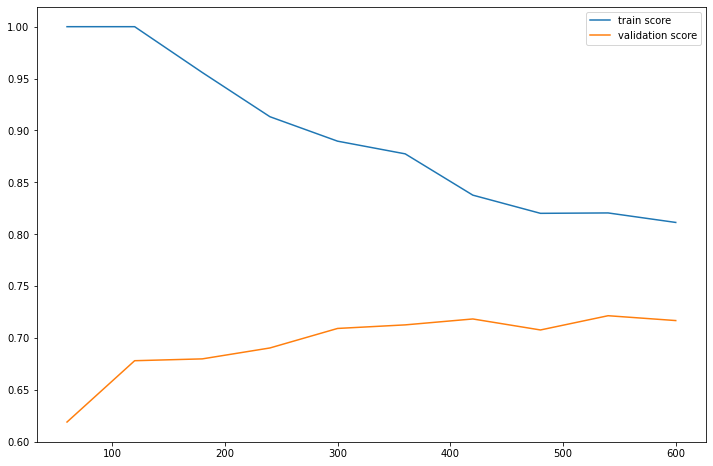

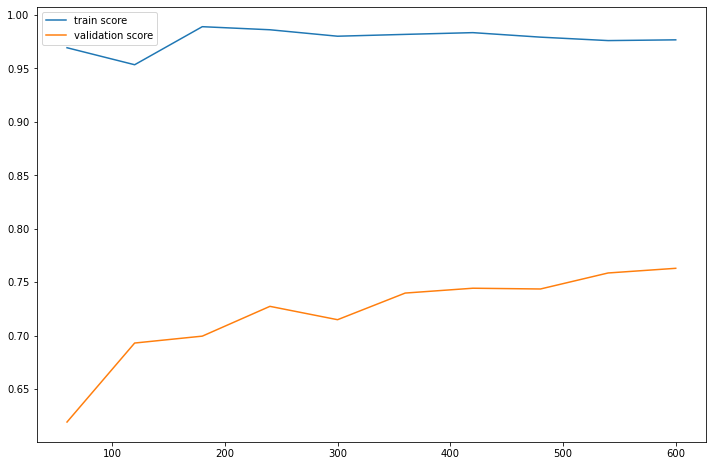

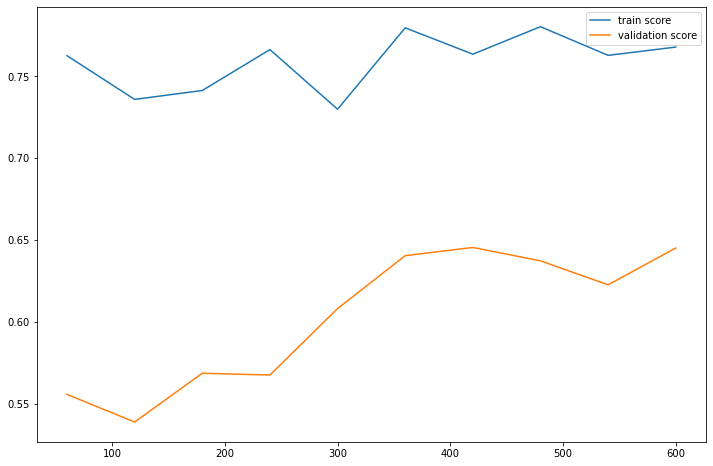

In [19]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Optimisation des meilleurs models

In [20]:
# SVM modele
hyper_params = {'gamma':[1e-3, 1e-4, 0.0005],
                'C':[1, 10, 100, 1000, 3000], }

grid = GridSearchCV(SVM, hyper_params, scoring='recall', cv=4)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'C': 1000, 'gamma': 0.001}
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        97
           1       0.81      0.78      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



[[78 19]
 [23 80]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        97
           1       0.81      0.78      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



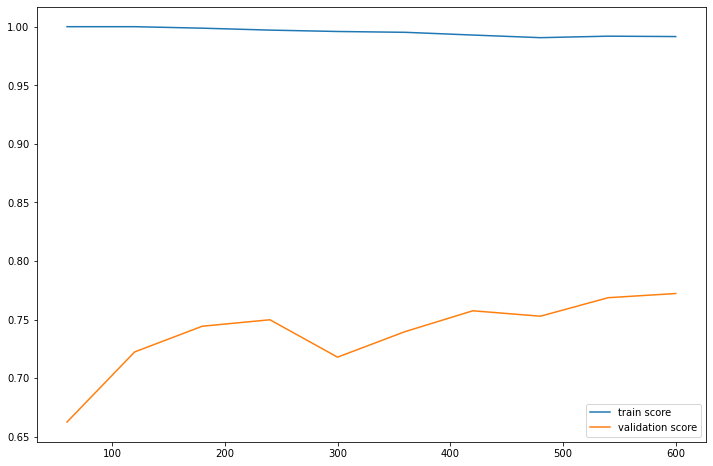

In [21]:
evaluation(grid.best_estimator_)

### Precision Recall Curve (Recherche du meilleur seuil)

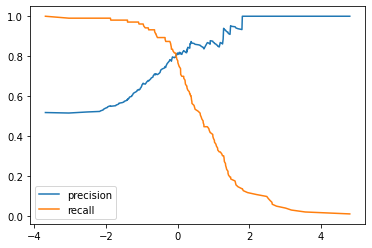

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [23]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [24]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=0)

In [25]:
f1_score(y_test, y_pred)

0.792079207920792

In [26]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7766990291262136
[[78 19]
 [23 80]]


<AxesSubplot:>

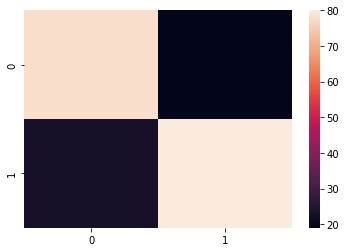

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred))

In [28]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [29]:
y_pred

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True, False,

## Creating the Bag of Words model

### 2. Tf-idf vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv2 = TfidfVectorizer(max_features = 1500)
X2 = cv2.fit_transform(corpus).toarray()
y2 = dataset.iloc[:, -1].values

<AxesSubplot:>

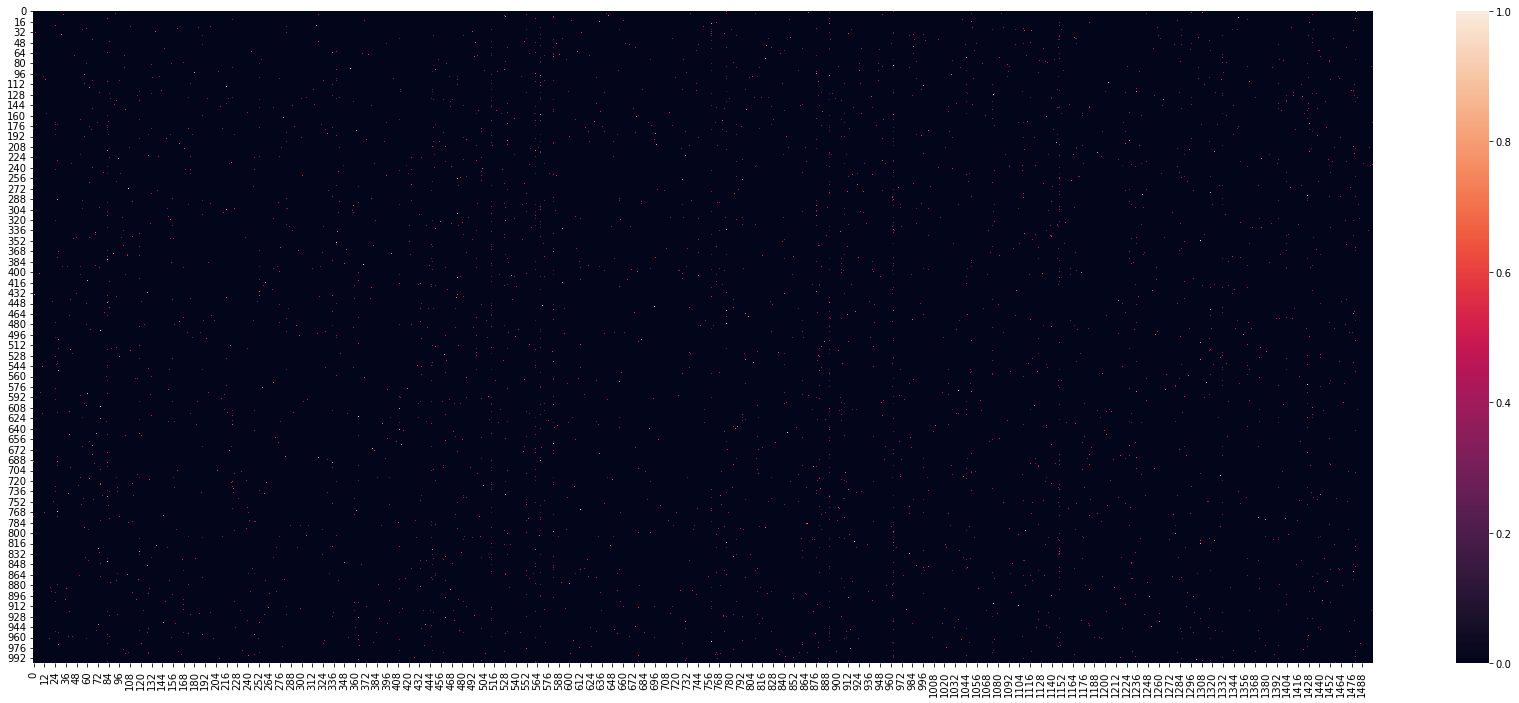

In [31]:
X3= pd.DataFrame(X2)
plt.figure(figsize=(30, 12))
sns.heatmap(X3)

[[55 42]
 [12 91]]
              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



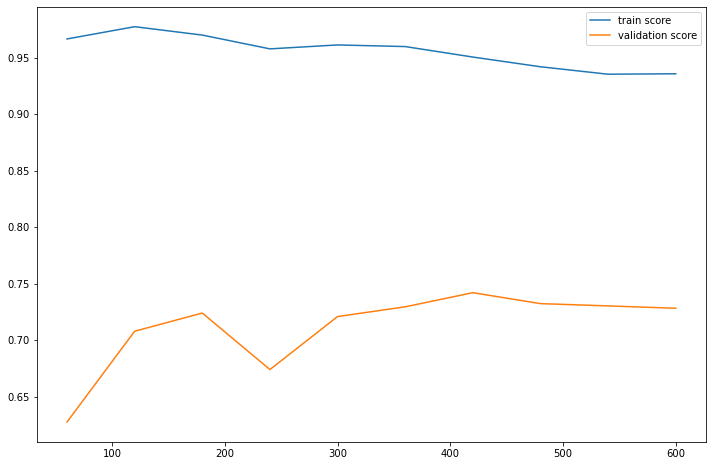

In [32]:
# spliting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20, random_state = 0)

# Modele baseline
classifier1 = GaussianNB()
evaluation(classifier1)

RandomForest
[[91  6]
 [39 64]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        97
           1       0.91      0.62      0.74       103

    accuracy                           0.78       200
   macro avg       0.81      0.78      0.77       200
weighted avg       0.81      0.78      0.77       200

AdaBoost
[[90  7]
 [45 58]]
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        97
           1       0.89      0.56      0.69       103

    accuracy                           0.74       200
   macro avg       0.78      0.75      0.73       200
weighted avg       0.78      0.74      0.73       200

SVM
[[89  8]
 [36 67]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        97
           1       0.89      0.65      0.75       103

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.78  

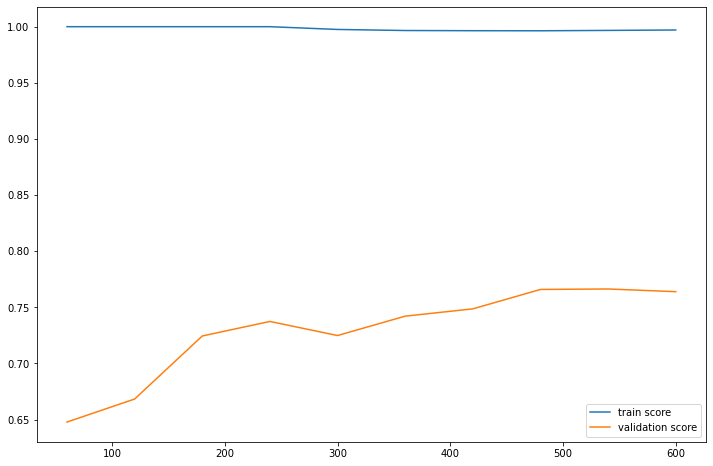

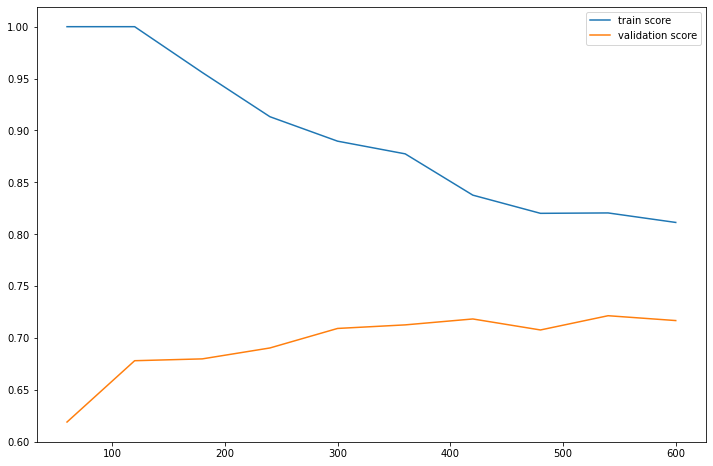

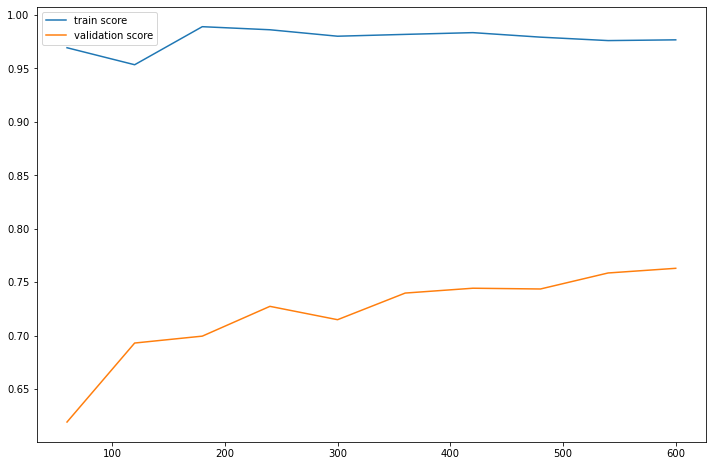

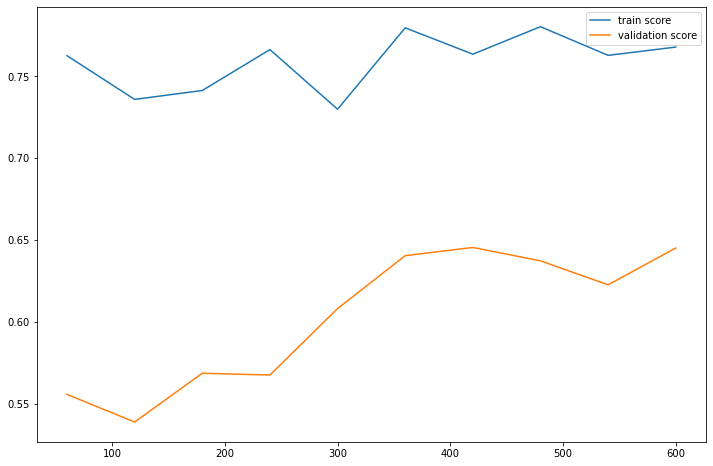

In [34]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

#### Results are the same with both techniques